In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import warnings
# warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv('https://github.com/YBIFoundation/Dataset/raw/main/Salary%20Data.csv')

In [5]:
df.head()

,Experience Years,Salary
0,1.1,39343
1,1.2,42774
2,1.3,46205
3,1.5,37731
4,2.0,43525


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Experience Years  40 non-null     float64
 1   Salary            40 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 768.0 bytes


In [8]:
df.describe()

,Experience Years,Salary
count,40.000000,40.000000
mean,5.152500,74743.625000
std,2.663715,25947.122885
min,1.100000,37731.000000
25%,3.200000,56878.250000
50%,4.600000,64472.500000
75%,6.875000,95023.250000
max,10.500000,122391.000000


In [9]:
df.corr()

,Experience Years,Salary
Experience Years,1.000000,0.977692
Salary,0.977692,1.000000


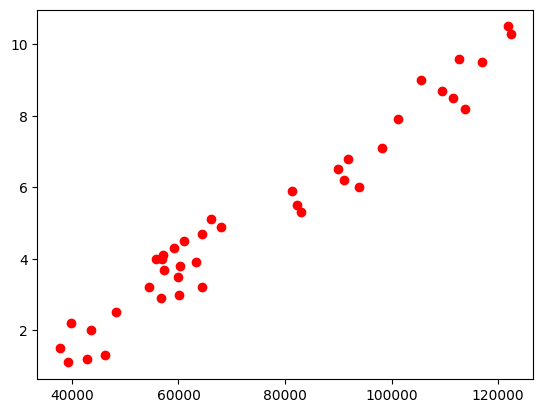

In [11]:
plt.scatter(df.Salary,df["Experience Years"],color='red')



In [12]:
df.columns

Index(['Experience Years', 'Salary'], dtype='object')

In [13]:
X=df[['Experience Years']]
y=df['Salary']

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=2529)

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
ss= StandardScaler()

In [18]:
X_train=ss.fit_transform(X_train)

In [19]:
pd.DataFrame(X_train).describe()

,0
count,3.000000e+01
mean,4.588922e-16
std,1.017095e+00
min,-1.430086e+00
25%,-7.642932e-01
50%,-8.025991e-02
75%,7.040983e-01
max,1.999201e+00


**ss.fit_transform** mean aprox to 0 and standard deviation aprox to 1.

In [20]:
X_test=ss.transform(X_test)

In [21]:
pd.DataFrame(X_test).describe()

,0
count,10.000000
mean,0.193353
std,0.853020
min,-0.554523
25%,-0.399475
50%,-0.262669
75%,0.594653
max,1.926238


**ss.transform** it just save operation , doesn't convert values, #Prevent Data Leakage

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
lr = LinearRegression()

In [24]:
lr.fit(X_train,y_train)

LinearRegression()

In [25]:
lr.coef_

array([25611.05388095])

In [26]:
lr.intercept_

73914.66666666666

#Model training is done!

In [27]:
#Predicting the values for training and testing sets

y_train_pred = lr.predict(X_train)

y_test_pred = lr.predict(X_test)

In [28]:
from sklearn.metrics import r2_score

In [29]:
train_accuracy = r2_score(y_train, y_train_pred)

test_accuracy = r2_score(y_test, y_test_pred)

In [30]:
print(f"Train Accuracy: {train_accuracy}")

print(f"Test Accuracy: {test_accuracy}")

Train Accuracy: 0.9561381195709755
Test Accuracy: 0.9514825765524552


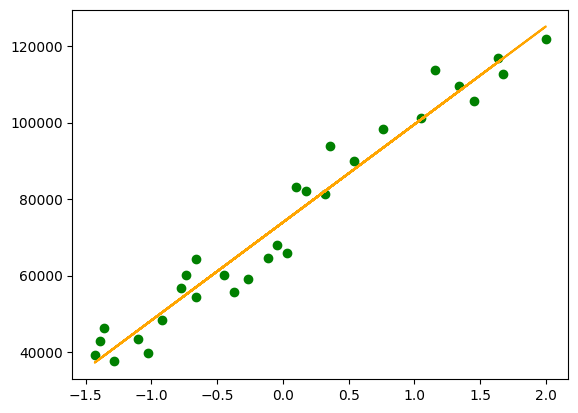

In [31]:
## plot Training data plot best fit line
plt.scatter(X_train,y_train,color='green')
plt.plot(X_train,lr.predict(X_train),color='orange')

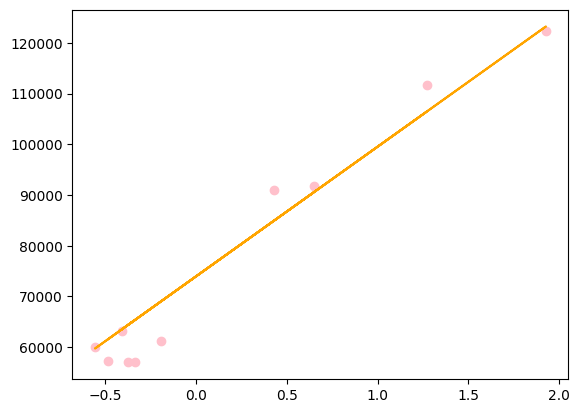

In [32]:
## plot Training data plot best fit line
plt.scatter(X_test,y_test,color='pink')
plt.plot(X_test,lr.predict(X_test),color='orange')

In [33]:
## Performance Metrics for Trian Data
from sklearn.metrics import mean_absolute_error,mean_squared_error

mse=mean_squared_error(y_train,y_train_pred)
mae=mean_absolute_error(y_train,y_train_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

30089953.262524553
4682.195267248722
5485.4310006165015


In [34]:
## Performance Metrics for Test Data
from sklearn.metrics import mean_absolute_error,mean_squared_error

mse=mean_squared_error(y_test,y_test_pred)
mae=mean_absolute_error(y_test,y_test_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

27140319.66184495
4182.144652363715
5209.63719099948


# Hence Coclusion : Generalized Model!

1.   Low Bias
2.   Low Variance

